##### The aim of this challenge is to identify whether there are any differences in the frontoparietal network activity during a planning task between obsessive-compulsive disorder (OCD) patients, their first-degree relatives and a set of matched controls.

fMRI data were collected from 14 obsessive-compulsive disorder patients, 12 relatives and 15 healthy controls while they performed a reversal-learning task. The participants were required to first identify a target from amongst four objects based on positive and negative feedback. The feedback was displayed after every second response. Periodically, the rule defining which of the four objects was target changed. When this happened, selecting the previously rewarded target generated negative as opposed to positive feedback. Therefore, the participant was required to stop selecting that object in order to identify the new target. The point at which this type of change in behaviour occurs is commonly referred to as a Reversal, or Contingency Reversal Learning. The frontoparietal network is known to be active during the reversal condition in the normal healthy brain. OCD patients are also known to struggle to perform such task. 

1. Assess whether the activation in the frontoparietal network is different between OCD patients and healthy controls. 
2. Can you supplement your regions of interest analysis with one that is conducted on individual voxels? 
3. A further question is whether the same abnormalities would be evident in the first-degree relatives of the patients. If so, there could be a network endophenotypes of OCD; i.e., a heritable abnormality that predisposes one towards developing the OCD behavioural phenotype, but that can be carried by individuals who do not actually have OCD themselves. Test this hypothesis by analysing the brain activation of the relatives, together with the healthy controls and OCD patients.

The data are stored in the directory *01_OCD_Data*. The directory contains the following files:

1. *controls*: folder with whole brain beta coefficients maps for control patients 
2. *patients*: folder with whole brain beta coefficients maps for OCD patients 
3. *relatives*: folder with whole brain beta coefficients maps for first-degree relatives OCD patients 
4. *MNI152_T1_1mm.nii*: standard brain template
5. *network_mask.nii*: mask of ROI

In [7]:
import scipy.io
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import pickle
import seaborn as sb
import pandas as pd
%matplotlib inline
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

sb.set_theme("talk")
sb.set_style("whitegrid")

import statsmodels.api as sm

In [8]:
pip install nibabel


Note: you may need to restart the kernel to use updated packages.


In [9]:
import nibabel as nib


In [11]:
mask = nib.load("Data/01_OCD_data/network_mask.nii")
template = nib.load("Data/01_OCD_data/MNI152_T1_1mm.nii")

template_arr = np.array(template.dataobj)
mask_arr = np.array(mask.dataobj)

mask_arr.shape, template_arr.shape

((91, 109, 91), (91, 109, 91))

Text(0.5, 1.0, 'Brain template')

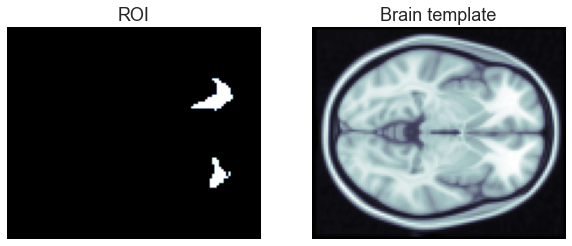

In [12]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.imshow(mask_arr[:, :, 34], cmap = "bone")
plt.axis("off")
plt.title("ROI")
plt.subplot(122)
plt.imshow(template_arr[:, :, 34], cmap = "bone")
plt.axis("off")
plt.title("Brain template")

Text(0.5, 1.0, 'Coronal Plane')

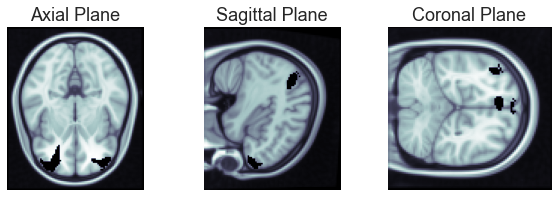

In [13]:
template_arr[mask_arr>0] = 0


plt.figure(figsize = (10, 3))
plt.subplot(131)
plt.imshow(template_arr[:, :, 34].T, cmap = "bone")
plt.axis("off")
plt.title("Axial Plane")
plt.subplot(132)
plt.imshow(template_arr[25, :, :], cmap = "bone")
plt.axis("off")
plt.title("Sagittal Plane")
plt.subplot(133)
plt.imshow(template_arr[:, 33, :], cmap = "bone")
plt.axis("off")
plt.title("Coronal Plane")

In [33]:
path_directory = "Data/01_OCD_data/controls//"
control_dir = os.listdir(path_directory)

control_all = []
for file in control_dir:
    loaded_img = nib.load(path_directory+file)
    imgfile = np.array(loaded_img.dataobj)
    imgfile[np.isnan(imgfile)] = 0
    control_all.append(imgfile)

len(control_all), control_all[0].shape

(15, (91, 109, 91))

In [15]:
control_all = np.array(control_all)
control_all.shape

(15, 91, 109, 91)

(-0.5, 108.5, 90.5, -0.5)

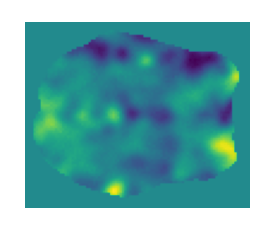

In [16]:
plt.imshow(control_all[0, :, :, 34], cmap = "viridis")
plt.axis("off")

In [42]:
path_directory = "Data/01_OCD_data/patients//"
patients_dir = os.listdir(path_directory)

patients_all = []
for file in patients_dir:
    loaded_img = nib.load(path_directory+file)
    imgfile = np.array(loaded_img.dataobj)
    patients_all.append(imgfile)

len(patients_all), patients_all[0].shape

(14, (91, 109, 91))

In [18]:
patients_all = np.array(patients_all)
patients_all.shape

(14, 91, 109, 91)

(-0.5, 108.5, 90.5, -0.5)

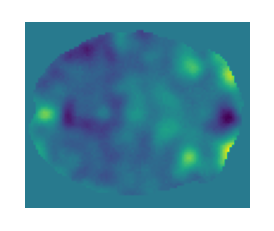

In [19]:
plt.imshow(patients_all[0, :, :, 34], cmap = "viridis")
plt.axis("off")

In [100]:
nvoxelsinmask = np.nansum(mask_arr)
nvoxelsinmask

1781.0

In [37]:
path_directory = "Data/01_OCD_data/relatives//"
relatives_dir = os.listdir(path_directory)

relatives_all = []
for file in relatives_dir:
    loaded_img = nib.load(path_directory+file)
    imgfile = np.array(loaded_img.dataobj)
    imgfile[np.isnan(imgfile)] = 0
    relatives_all.append(imgfile)

len(relatives_all), relatives_all[0].shape

(12, (91, 109, 91))

In [38]:
relatives_all = np.array(relatives_all)
relatives_all.shape

(12, 91, 109, 91)

(-0.5, 108.5, 90.5, -0.5)

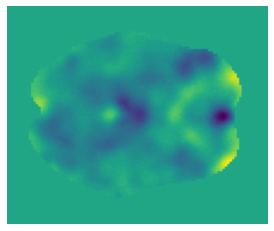

In [39]:
plt.imshow(relatives_all[0, :, :, 34], cmap = "viridis")
plt.axis("off")

In [23]:
C = []

for n_subj in range(control_all.shape[0]):
    
    # Extract each subject by using the first dimension of the array
    currentsubject = control_all[n_subj,:,:, :]
    currentsubject = currentsubject * mask_arr
    mean_beta = np.nansum(currentsubject) /nvoxelsinmask
    C.append(mean_beta)
print(C)

NameError: name 'nvoxelsinmask' is not defined

In [106]:
R = []

for n_subj in range(relatives_all.shape[0]):
    
    # Extract each subject by using the first dimension of the array
    currentsubject = relatives_all[n_subj,:,:, :]
    currentsubject = currentsubject * mask_arr
    mean_beta = np.nansum(currentsubject) /nvoxelsinmask
    R.append(mean_beta)
print(R)

[0.9661429, 0.30490464, 1.8051263, 0.51726913, 1.0713351, 0.8428347, -0.12490112, 0.7239627, 2.5537271, 1.0961589, 0.24851774, -0.46144858]


In [107]:
P = []

for n_subj in range(patients_all.shape[0]):
    
    # Extract each subject by using the first dimension of the array
    currentsubject = patients_all[n_subj,:,:, :]
    currentsubject = currentsubject * mask_arr
    mean_beta = np.nansum(currentsubject) /nvoxelsinmask
    P.append(mean_beta)
print(P)

[1.7547265, 2.6166513, -0.5936894, 0.44485834, 1.3670107, 0.51621675, -0.5135113, 0.23036718, 0.6671082, 0.17020388, 0.09134069, 0.92238486, 0.5863165, 0.6554992]


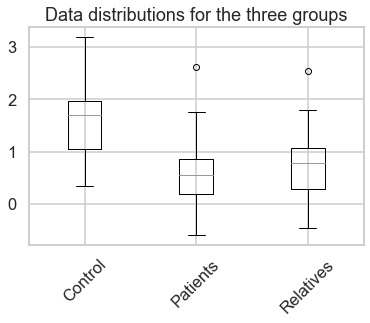

In [108]:
_ = plt.boxplot([C, P, R], labels = ["Control", "Patients", "Relatives"])
_ = plt.title('Data distributions for the three groups')
_ = plt.xticks(rotation=45)

In [110]:
from scipy.stats.mstats import winsorize

In [126]:
P_W= winsorize((P),(0.05,0.05))
R_W=winsorize((R),(0.05,0.05))

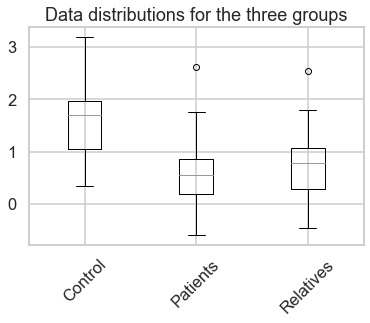

In [127]:
_ = plt.boxplot([C, P_W, R_W], labels = ["Control", "Patients", "Relatives"])
_ = plt.title('Data distributions for the three groups')
_ = plt.xticks(rotation=45)

In [128]:
winsorized_data = [C, P_W, R_W]

for i, data in enumerate(winsorized_data):
    shapiro_pvalue = shapiro(data).pvalue
    if shapiro_pvalue < 0.01:
        print("Distribution of group", i, "is significantly different from a normal distribution")
    else:
        print("Distribution of group", i, "is not significantly different from a normal distribution")

Distribution of group 0 is not significantly different from a normal distribution
Distribution of group 1 is not significantly different from a normal distribution
Distribution of group 2 is not significantly different from a normal distribution


In [129]:
import pingouin as pg
from bioinfokit.analys import stat

In [130]:
ttest=pg.ttest(C,P_W)
print(ttest)

               T        dof alternative    p-val         CI95%   cohen-d  \
T-test  3.124723  26.584316   two-sided  0.00427  [0.33, 1.59]  1.163411   

         BF10     power  
T-test  9.838  0.854895  


In [131]:


anova=scipy.stats.f_oneway(C,P_W,R_W)
print(anova)

F_onewayResult(statistic=5.644440931933099, pvalue=0.007139338586713413)


In [152]:
import statsmodels.api as sm



In [171]:
C2=pd.DataFrame(C, columns=["Activation"])
C2=C2.assign(Group="Controls")
P_W2=pd.DataFrame(P_W, columns=["Activation"])
P_W2=P_W2.assign(Group="Patients")
R_W2=pd.DataFrame(R_W, columns=["Activation"])
R_W2=R_W2.assign(Group="Relatives")


In [172]:
dfs=pd.concat([C2, P_W2, R_W2])


In [173]:
dfs

,Activation,Group
0,1.331321,Controls
1,1.898643,Controls
2,2.445141,Controls
3,0.576057,Controls
4,0.341974,Controls
5,2.047561,Controls
6,0.765436,Controls
7,3.198792,Controls
8,1.578618,Controls
9,1.876796,Controls


In [175]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=dfs['Activation'], groups=dfs['Group'], alpha=0.05)

In [176]:
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
Controls  Patients  -0.9607  0.009 -1.7069 -0.2144   True
Controls Relatives  -0.8022  0.042   -1.58 -0.0244   True
Patients Relatives   0.1585 0.8768 -0.6316  0.9485  False
---------------------------------------------------------


AttributeError: 'list' object has no attribute 'shape'

individual volex in whole brain, 1:1 comparison to group, do for all voxels. Initialise a mtrix of the same shape, do t tests between these analyses and input in this matrix. one test per voxel. loop. p vzlur and t val in matrix